In [7]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt

print('tensorflow Version:{}'.format(tf.__version__))


tensorflow Version:2.0.0-beta0


In [4]:
train_dataset = h5py.File('/Users/zhenwuzhou/.keras/datasets/train_catvnoncat.h5', "r")
train_x = np.array(train_dataset["train_set_x"][:])  # shape(209,64,64,3)
train_y = np.array(train_dataset["train_set_y"][:])  # shape(209,)

test_dataset = h5py.File('/Users/zhenwuzhou/.keras/datasets/test_catvnoncat.h5', "r")
test_x = np.array(test_dataset["test_set_x"][:])
test_y = np.array(test_dataset["test_set_y"][:])
print("初始数据\n", train_x.shape, train_y.shape, test_x.shape, test_y.shape)

train_m = train_y.shape[0]
TrainX = train_x.reshape(train_x.shape[0], -1).T / 255  # 64*64*3=12288行，m列的输入矩阵 ，除以255是为了做均值归一化操作
TrainY = train_y.reshape(1, train_m)  # 1行m列真实结果的矩阵
test_m = test_y.shape[0]
TestX = test_x.reshape(test_x.shape[0], -1).T / 255
TestY = test_y.reshape(1, test_m)
print("整理后的数据\n", TrainX.shape, TrainY.shape, TestX.shape, TestY.shape)


初始数据
 (209, 64, 64, 3) (209,) (50, 64, 64, 3) (50,)
整理后的数据
 (12288, 209) (1, 209) (12288, 50) (1, 50)


In [5]:
    TrainX = TrainX.T
    TrainY = TrainY.T

    # 建立神经网络模型
    mode = tf.keras.Sequential()  # 用 keras建立一个序列模型

    # 创建layer1 ：注意第一层要制定input_shape,
    layer1 = tf.keras.layers.Dense(10, input_shape=(TrainX.shape[1],), activation='relu')  # 第一层10个神经单元，激活函数采用relu;
    mode.add(layer1)

    # 创建layer2 ： 可以不制定input_shape，会
    layer2 = tf.keras.layers.Dense(7, activation='relu')  # 第二层7个神经单元，激活函数采用relu
    mode.add(layer2)

    # 创建输出层 ：输出层是一个神经单元，激活函数采用二元分类函数sigmoid
    layer_out_put = tf.keras.layers.Dense(1, activation='sigmoid')
    mode.add(layer_out_put)

    mode.summary()  # 打出model的各项参数

    # 定义loss代价函数及一些其他相关超参数
    mode.compile(optimizer="adam", loss="binary_crossentropy",
                 metrics=['acc'])  # 采用adam优化，binary_crossentropy二元分类损失函数;metrics可以输出正确率acc

    # 执行梯度下降，进行训练
    history = mode.fit(TrainX, TrainY, epochs=200)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                122890    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 122,975
Trainable params: 122,975
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 209 samples
Epoch 1/200
209/209 [==============================] - 0s 749us/sample - loss: 0.7952 - acc: 0.5215
Epoch 2/200
209/209 [==============================] - 0s 79us/sample - loss: 0.7620 - acc: 0.5072
Epoch 3/200
209/209 [==============================] - 0s 69us/sam

209/209 [==============================] - 0s 61us/sample - loss: 0.1076 - acc: 0.9809
Epoch 72/200
209/209 [==============================] - 0s 60us/sample - loss: 0.0873 - acc: 0.9856
Epoch 73/200
209/209 [==============================] - 0s 58us/sample - loss: 0.0813 - acc: 0.9952
Epoch 74/200
209/209 [==============================] - 0s 62us/sample - loss: 0.0815 - acc: 0.9904
Epoch 75/200
209/209 [==============================] - 0s 61us/sample - loss: 0.0880 - acc: 0.9856
Epoch 76/200
209/209 [==============================] - 0s 59us/sample - loss: 0.0763 - acc: 0.9952
Epoch 77/200
209/209 [==============================] - 0s 60us/sample - loss: 0.0794 - acc: 0.9904
Epoch 78/200
209/209 [==============================] - 0s 74us/sample - loss: 0.1407 - acc: 0.9522
Epoch 79/200
209/209 [==============================] - 0s 81us/sample - loss: 0.1422 - acc: 0.9569
Epoch 80/200
209/209 [==============================] - 0s 74us/sample - loss: 0.1332 - acc: 0.9474
Epoch 81/200


209/209 [==============================] - 0s 73us/sample - loss: 0.0159 - acc: 1.0000
Epoch 153/200
209/209 [==============================] - 0s 62us/sample - loss: 0.0180 - acc: 1.0000
Epoch 154/200
209/209 [==============================] - 0s 61us/sample - loss: 0.0170 - acc: 1.0000
Epoch 155/200
209/209 [==============================] - 0s 63us/sample - loss: 0.0157 - acc: 1.0000
Epoch 156/200
209/209 [==============================] - 0s 61us/sample - loss: 0.0172 - acc: 1.0000
Epoch 157/200
209/209 [==============================] - 0s 60us/sample - loss: 0.0192 - acc: 1.0000
Epoch 158/200
209/209 [==============================] - 0s 60us/sample - loss: 0.0170 - acc: 1.0000
Epoch 159/200
209/209 [==============================] - 0s 57us/sample - loss: 0.0170 - acc: 1.0000
Epoch 160/200
209/209 [==============================] - 0s 60us/sample - loss: 0.0155 - acc: 1.0000
Epoch 161/200
209/209 [==============================] - 0s 63us/sample - loss: 0.0149 - acc: 1.0000
Epoc

In [6]:
print("history的keys:",history.history.keys())

history的keys: dict_keys(['loss', 'acc'])


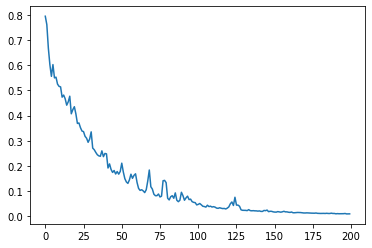

In [8]:
# 绘制出epoch与loss的图
plt.plot(history.epoch,history.history['loss'])

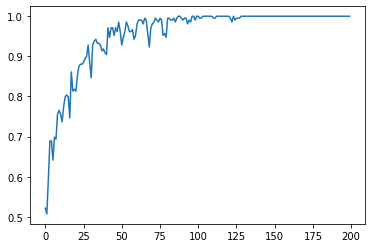

In [9]:
plt.plot(history.epoch,history.history.get('acc'))